In [ ]:
!unzip /content/test_set.zip

Archive:  /content/test_set.zip
   creating: test_set/
   creating: test_set/cats/
  inflating: test_set/cats/_DS_Store  
  inflating: test_set/cats/cat.4001.jpg  
  inflating: test_set/cats/cat.4002.jpg  
  inflating: test_set/cats/cat.4003.jpg  
  inflating: test_set/cats/cat.4004.jpg  
  inflating: test_set/cats/cat.4005.jpg  
  inflating: test_set/cats/cat.4006.jpg  
  inflating: test_set/cats/cat.4007.jpg  
  inflating: test_set/cats/cat.4008.jpg  
  inflating: test_set/cats/cat.4009.jpg  
  inflating: test_set/cats/cat.4010.jpg  
  inflating: test_set/cats/cat.4011.jpg  
  inflating: test_set/cats/cat.4012.jpg  
  inflating: test_set/cats/cat.4013.jpg  
  inflating: test_set/cats/cat.4014.jpg  
  inflating: test_set/cats/cat.4015.jpg  
  inflating: test_set/cats/cat.4016.jpg  
  inflating: test_set/cats/cat.4017.jpg  
  inflating: test_set/cats/cat.4018.jpg  
  inflating: test_set/cats/cat.4019.jpg  
  inflating: test_set/cats/cat.4020.jpg  
  inflating: test_set/cats/cat.4021.jp

In [ ]:
# STEP 1: Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# STEP 2: Load Dataset & Preprocess

def load_data(cat_dir, dog_dir, img_size=64):
    X = []
    y = []

    # Load cat images
    for filename in os.listdir(cat_dir):
        if filename.endswith(".jpg"):
            path = os.path.join(cat_dir, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img.flatten())
            y.append(0)  # 0 for cat

    # Load dog images
    for filename in os.listdir(dog_dir):
        if filename.endswith(".jpg"):
            path = os.path.join(dog_dir, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img.flatten())
            y.append(1)  # 1 for dog

    return np.array(X), np.array(y)


In [ ]:
# STEP 3: Prepare Data
cat_path = '/content/test_set/cats'
dog_path = '/content/test_set/dogs'

X, y = load_data(cat_path, dog_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# STEP 4: Train the SVM Model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Optional: Check accuracy
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))


Accuracy: 0.5358024691358024


In [ ]:
# STEP 5: Predict and Show Any One Image with Output

def predict_and_show(image_path, model, img_size=64):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (img_size, img_size))
    flat = resized.flatten().reshape(1, -1)

    prediction = model.predict(flat)[0]
    label = "Cat" if prediction == 0 else "Dog"

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()


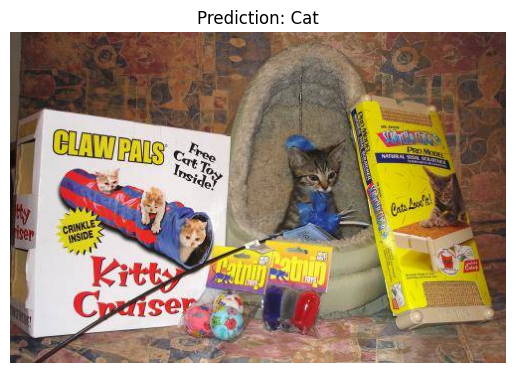

In [ ]:
predict_and_show("/content/test_set/cats/cat.4308.jpg", model)

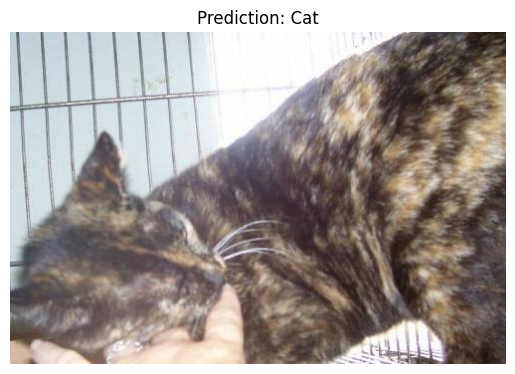

In [ ]:
predict_and_show("/content/test_set/cats/cat.4006.jpg", model)

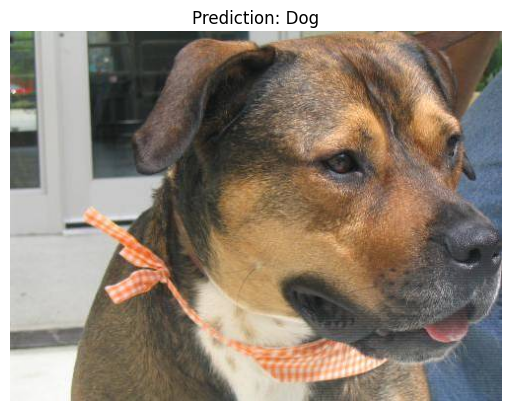

In [ ]:
predict_and_show("/content/test_set/dogs/dog.4484.jpg", model)